Hannath T

<h2>PORTUGESE BANK MARKETING PROJECT</h2>

<h5>Goal:</h5>

The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe to a term deposit (variable y).

<h5>Abstarct: </h5>

Marketing campaigns in the banking sector often suffer from low response and high operational cost due to ineffective customer targeting.Banks often spend long time in contacting to find the clients for their product.This project used portugese banking dataset by portuguese banking institute from may 2008 to november 2010.Multiple classification algorithms were evaluated like, Logistic regression,Decision tree,Random Forest,Gradient Boosting and XGBoost and best model is selected to help banks to find high probablity customers,increase efficiency in marketing,reduce unnecessary outreach.

A term deposit is a banking product where customers invest a fixed amount of money for a predetermined period in return for higher interest. In this project, the objective is to predict whether a customer will subscribe to such a product when contacted by the bank.

initially bank have to contact every customer about the subscription to a term deposit,and most customer reject the plan causing waste of time ,large no:of calls and less subscription.Customer decisions depend on multiple factors such as age, job, loan status, 
previous campaign outcomes, and contact timing.Machine learning helps to predict the outcome of the call(Yes/No) using historical data.

<h5>Tasks completed:</h5>

Task 1:-Prepared a complete data analysis report on the given data.

Task 2:-Created a predictive model which will help the bank marketing team to know which customer will buy the product.

Task3:-Made Suggestions to the Bank market team to make  customers  buy the product.

Task4:-Created a report stating the performance of multiple models on this data and suggest the best model for production.

Task5:-Created a report which should include challenges you faced on data and what technique used with proper reason.

<h5>Attribute Information:</h5>
      Input variables:

1. age (numeric)
2. job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3. marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4. education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5. default: has credit in default? (categorical: 'no','yes','unknown')
6. housing: has housing loan? (categorical: 'no','yes','unknown')
7. loan: has personal loan? (categorical: 'no','yes','unknown')
related with the last contact of the current campaign:
8. contact: contact communication type (categorical: 'cellular','telephone')
9. month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10. day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11. duration: last contact duration, in seconds (numeric).
    - Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

other attributes:

12. campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13. pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14. previous: number of contacts performed before this campaign and for this client (numeric)
15. poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')

social and economic context attributes:

16. emp.var.rate: employment variation rate - quarterly indicator (numeric)
17. cons.price.idx: consumer price index - monthly indicator (numeric)
18. cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19. euribor3m: euribor 3 month rate - daily indicator (numeric)
20. nr.employed: number of employees - quarterly indicator (numeric)
Output variable (desired target):
21. y - has the client subscribed a term deposit? (binary: 'yes','no')

<h5>dataset explaination</h5>

1. default-> Whether the customer has credit default history(unpaid loan or EMI)

2. campaign-> Number of contacts performed during the current marketing campaign for this customer.

3. pdays-> Number of days passed since the customer was last contacted in a previous campaign.999-> not conta ted

4. previous-> Number of contacts performed before the current campaign.

5. previous = 0 -> never contacted earlier

6. previous= 3 -> contacted three times earlier

7. poutcome-> Outcome of the previous marketing campaign.

8. emp.var.rate-> Employment Variation Rate (how employment levels are changing over time in the economy.)

9. cons.price.idx (Consumer Price Index)-> measures the average change in prices that consumers pay for everyday items

10. cons.conf.idx (Consumer Confidence Index)->measures how optimistic consumers feel about economic conditions. Higher confidence indicates greater financial stability and willingness to invest, which positively influences term deposit subscriptions

people with:
Job security
Income stability
Future economic conditions
Ability to spend or save money
will have higher chances of yes (invest)-> less negative value

Fear of job loss
Economic uncertainty
Worry about expenses
low chaces of yes-> -50(high negative value

This is a macroeconomic feature
Same value appears for many customers
Depends on the time period

why its negative->the index is measured relative to a reference (baseline) level or an long teram average , not as a percentage or score from 0 to 100.

11. euribor3m-> Interest rate at which European banks lend to each other.Interest rate at which European banks lend to each other.
nr.employed-> Number of employed people (in thousands).talking about economic condition.people contacted on a samec time have this as a same value

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
import os
os.listdir()

['.ipynb_checkpoints',
 'bank-additional-full.csv',
 'Portuguese_Bank_Marketing-.ipynb',
 'requirements-.txt']

In [3]:
#df=pd.read_csv("bank-additional-full.csv")

In [4]:
#df

In [5]:
df=pd.read_csv("bank-additional-full.csv",sep=';')

<h5>Basic Checks and EDA:</h5>

In [6]:
#pd.set_option('display.max_rows',None)      #there are unknowns
#df

In [7]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [8]:
df.tail()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41187,74,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,3,999,1,failure,-1.1,94.767,-50.8,1.028,4963.6,no


In [9]:
df.shape

(41188, 21)

In [10]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [11]:
df.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [13]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [14]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [15]:
df['age'].isnull().sum()

np.int64(0)

In [16]:
df['y'].value_counts()

y
no     36548
yes     4640
Name: count, dtype: int64

* 41188 -> rows and 21 columns

* No null values present in dataset

* target=y(Yes/No)

* presents of target imbalane (more no and less yes)

* presents of feature called duration which cannot be understood before call,so this feature cannot be used for model training.b/c cause unrealistic prediction

* several categoraical features


* The dataset contains both numerical and categorical variables representing
* customer demographics, financial information, and marketing campaign details.

In [17]:
df['y'].value_counts(normalize=True)   # gives count as percentage

y
no     0.887346
yes    0.112654
Name: proportion, dtype: float64

converting to numerical and categorical columns

In [18]:
num_cols=df.select_dtypes(include=['int','float']).columns
cate_cols=df.select_dtypes(include=['object']).columns

In [19]:
num_cols

Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'],
      dtype='object')

In [20]:
cate_cols

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome', 'y'],
      dtype='object')

In [21]:
sns.set(style="whitegrid")

In [22]:
#df['job']
df['job'].unique()

array(['housemaid', 'services', 'admin.', 'blue-collar', 'technician',
       'retired', 'management', 'unemployed', 'self-employed', 'unknown',
       'entrepreneur', 'student'], dtype=object)

In [23]:
df['job'].value_counts()

job
admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: count, dtype: int64

In [24]:
df['education'].value_counts()

education
university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: count, dtype: int64

**More customers are on university degree category**

Text(0.5, 1.0, 'target variable distribution')

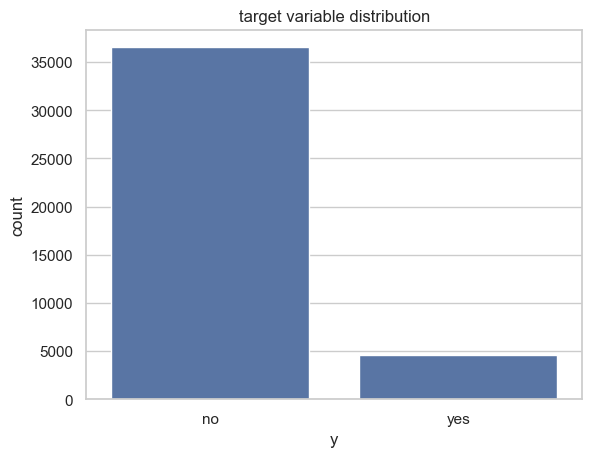

In [25]:
sns.countplot(x='y',data=df)
plt.title("target variable distribution")

**the graph shows large no:of no as the outcome,large data imbalance**

<Axes: xlabel='default', ylabel='count'>

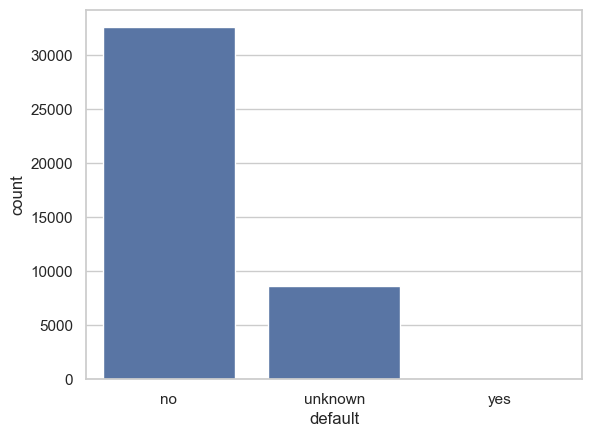

In [26]:
sns.countplot(x='default',data=df)

**most customers have no default and compairtively less unknowm default category**

<Axes: xlabel='loan', ylabel='count'>

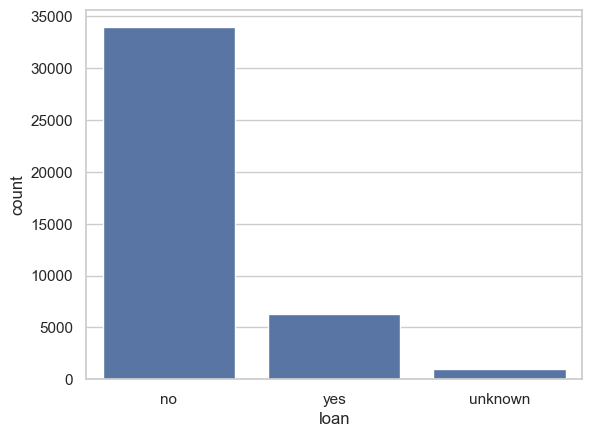

In [27]:
sns.countplot(x='loan',data=df)

**large number of no loan customers**

<Axes: xlabel='housing', ylabel='count'>

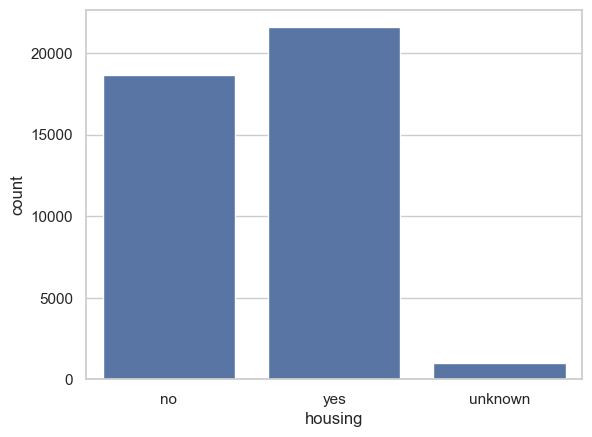

In [28]:
sns.countplot(x='housing',data=df)

**more customers on with housing**

Text(0.5, 1.0, 'age distribution')

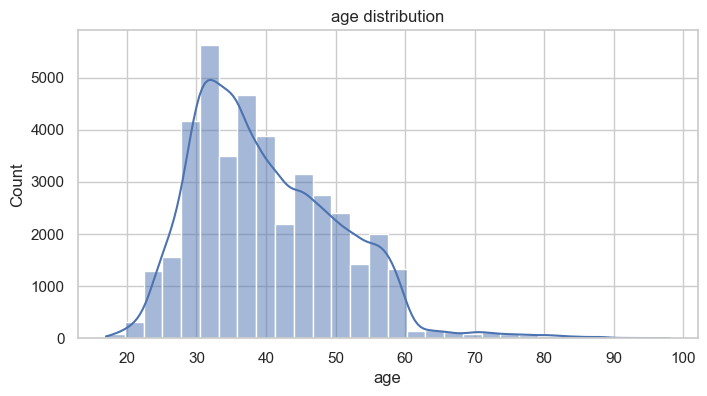

In [29]:
plt.figure(figsize=(8,4))
sns.histplot(df['age'],bins=30,kde=True)    #bins=30 -> divide into 30 age groups(ranges),30 b/c no too small or big(not less presise and not noisy)
plt.title("age distribution")

#Bar plot	For categorical data 
#Count plot	Counts categories 
#Box plot	Shows outliers but not distribution shape
#Histplot	Shows full distribution 
#age is a numerical data and hist shows num distributions

**most customers are among the age 30 to 50 (working age)**

Text(0.5, 1.0, 'mode of contact')

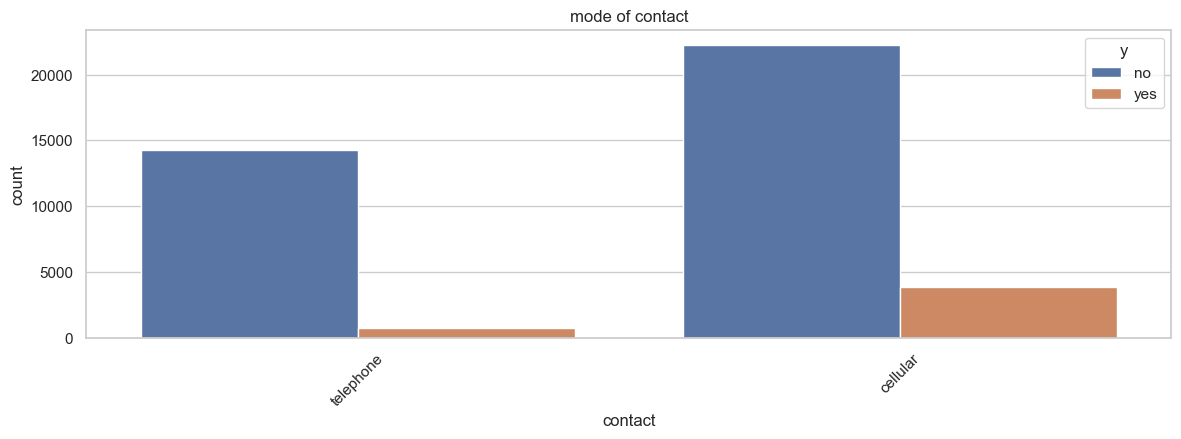

In [30]:
plt.figure(figsize=(14,4))
sns.countplot(x='contact',hue='y',data=df)
plt.xticks(rotation=45)
plt.title("mode of contact")

**compairively cellular has more customers and more subscription**

Text(0.5, 1.0, 'job and subscription')

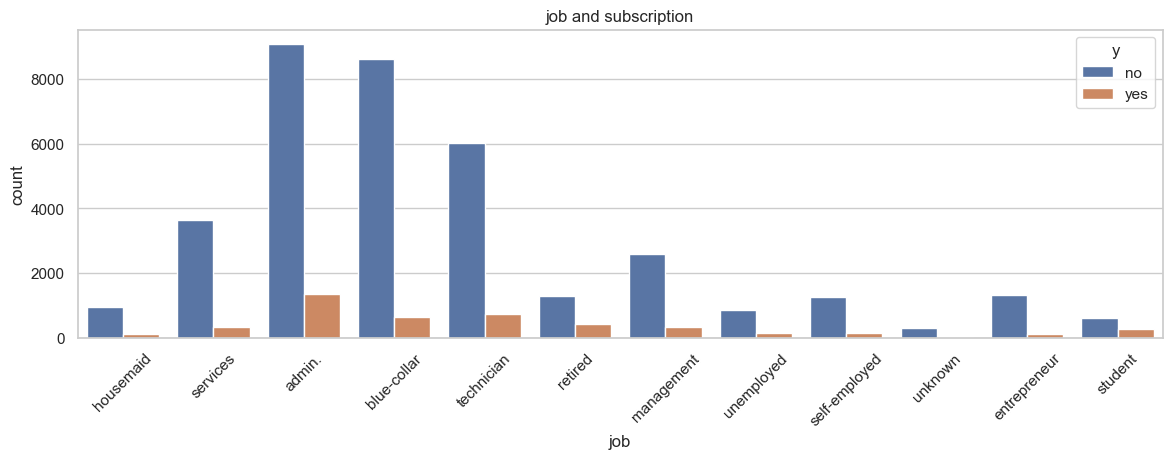

In [31]:
plt.figure(figsize=(14,4))
sns.countplot(x='job',hue='y',data=df)
plt.xticks(rotation=45)
plt.title("job and subscription")

**from the graph,admin,blue-collar,technician,services are dominant**

**retired shows more subscription even though the number of contact is less**

Text(0.5, 1.0, 'education and subscription')

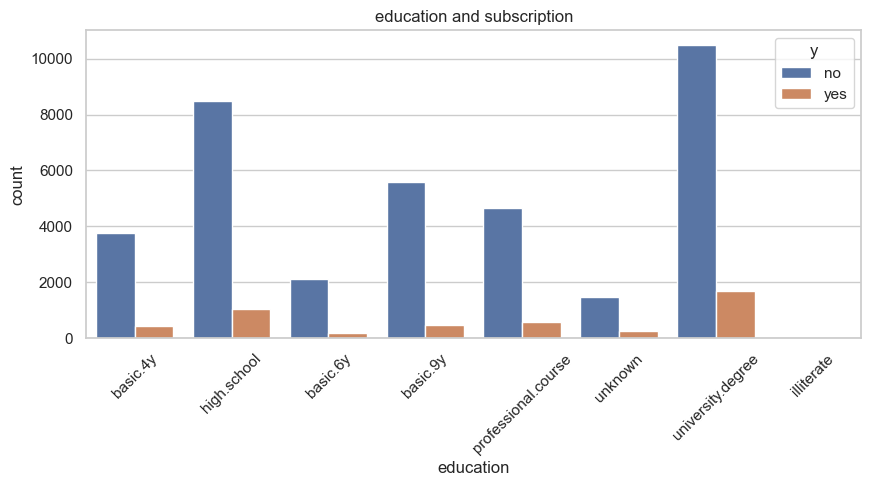

In [32]:
plt.figure(figsize=(10,4))
sns.countplot(x='education',hue='y',data=df)
plt.xticks(rotation=45)
plt.title("education and subscription")

**more the education,more chances of subscription**

Text(0.5, 1.0, 'marital status and subscription')

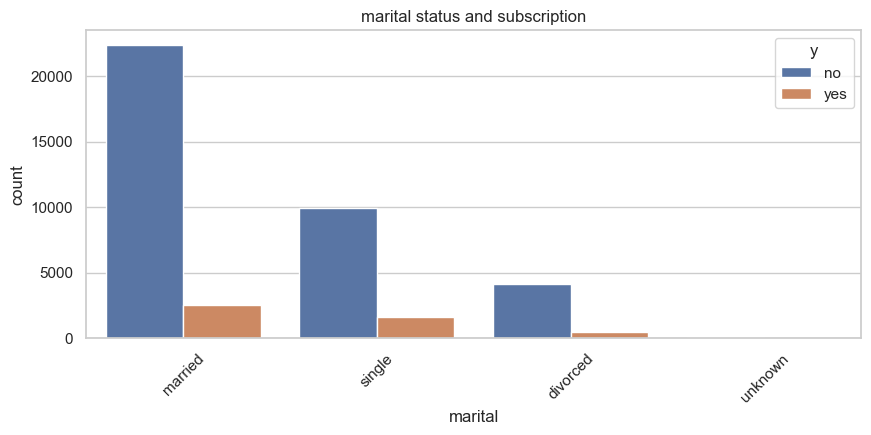

In [33]:
plt.figure(figsize=(10,4))
sns.countplot(x='marital',hue='y',data=df)
plt.xticks(rotation=45)
plt.title("marital status and subscription")

**Most customers are married and singles have slightly high chance of subscription ,married category is the dominant**

Text(0.5, 1.0, 'Subscription Rate by Month')

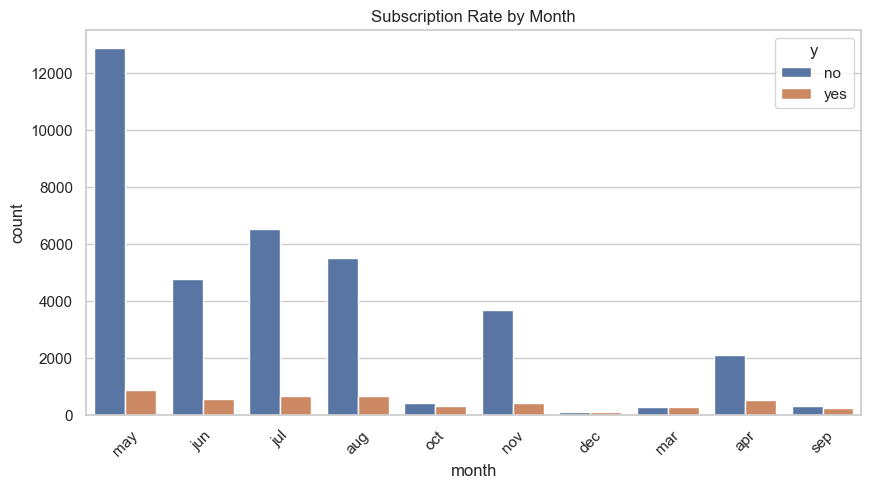

In [34]:
plt.figure(figsize=(10,5))
sns.countplot(x='month',hue='y',data=df)
plt.xticks(rotation=45)
plt.title("Subscription Rate by Month")

**More no:of contact performed on may**

**April have more Subscriptions ,even though the contact is less**

<h5>checking on Outliers:</h5>

<Axes: ylabel='age'>

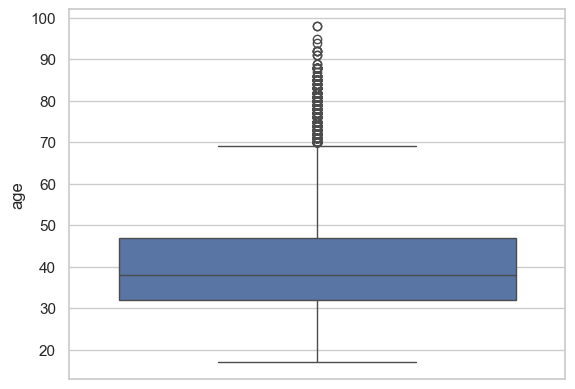

In [35]:
sns.boxplot(df.age)

**Outliers from 70 to 95 ( can be considered)**

<Axes: xlabel='y', ylabel='euribor3m'>

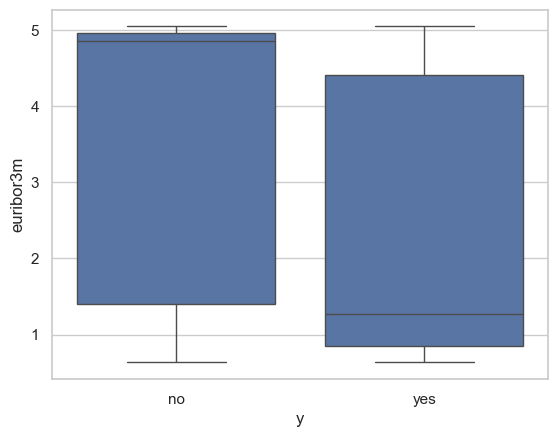

In [36]:
sns.boxplot(x='y', y='euribor3m', data=df)

**Lower interest rates → higher subscriptions**

**Economic conditions strongly influence decisions**

Text(0.5, 1.0, 'no:of contacts and subscription')

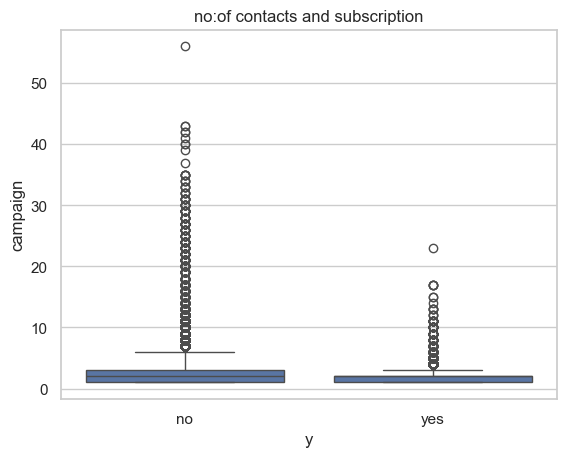

In [37]:
sns.boxplot(x='y',y='campaign',data=df) #y is categor and campaign is numerical 
#standerd visualisation rule -> cat on x axis and nume on y axis
#also boxplot expect numerical on y
plt.title("no:of contacts and subscription")

why box
* Median (middle value)
* Spread of data
* Outliers
* Overall distribution shape

**overcalling is ineffective ,calling repeatedly will not give any benefits**

**Customer contacted fewer times had higher subscription probablity**

Text(0.5, 1.0, 'duration and subscription')

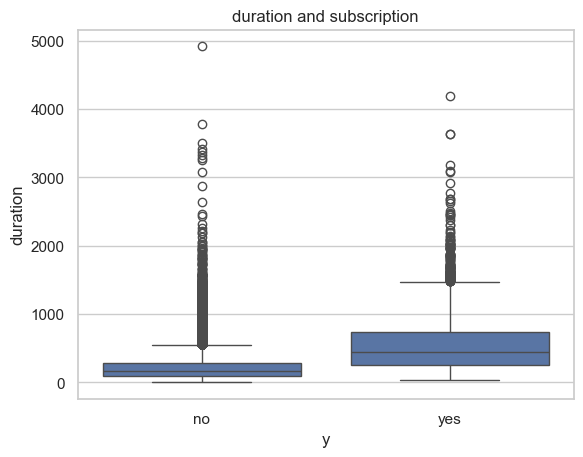

In [38]:
sns.boxplot(x='y',y='duration',data=df)
plt.title("duration and subscription")

**longer call= higher yes,
cannot be used in traing eventhough it shows strong relation to outcome.**

**Duration is known only after the call finishes/also probably finalise about subscription
But prediction is needed before calling the customer**

**Data leakage occurs when information unavailable at prediction time is used during model training, leading to unrealistic performance. In this project, call duration was excluded to prevent leakage**

**The dataset is imbalanced, reflecting real marketing scenarios. We are using SMOTE for balancing the training data.And keeping the testing data imbalanced.**

<h4>completed Task 1: Prepared a complete data analysis report on the given data </h4>

<h5>Data Preprocessing</h5>

In [39]:
#dropping the duration column
df.drop(columns=['duration'],inplace=True)

In [40]:
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [41]:
#converting target from yes/no to 1/0
df['y']=df['y'].map({'yes':1,'no':0})

In [42]:
#df

In [43]:
#separating outcome from data
X=df.drop('y',axis=1)
Y=df['y']

In [44]:
#X

In [45]:
#Y

In [46]:
#converting the changed data into num and cat features
numerical_features=X.select_dtypes(include=['int64','float64']).columns.tolist()
categorical_features=X.select_dtypes(include=['object']).columns.tolist()

In [47]:
numerical_features

['age',
 'campaign',
 'pdays',
 'previous',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed']

In [48]:
categorical_features

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'poutcome']

<h4> Pipeline </h4>

* Train-Test Split
* One-Hot Encoding
* Scaling
* SMOTE (Training only)
* Model Training
* Evaluation

<h4>Train and test split</h4>

In [49]:
#splitting to train and test,stratity used for equal split of yes/no(equal ratio for both train and test),eg:50 no and 2 yes for train and for test as well
X_train,X_test,Y_train,Y_test=train_test_split(
    X,Y,test_size=0.2,
    random_state=42,
    stratify=Y)

label encoding thinks category with order 1>2>3,ordinal is used when there is order like low<medi...
one hot encoding create 1 0 0 method for converting words into numbers,not ranking
drop_first=True ,this uses two columns only ,if 0 0 then third will be 1


<h4>one hot encoding</h4>

In [50]:
X_train=pd.get_dummies(X_train,drop_first=True)
X_test=pd.get_dummies(X_test,drop_first=True)

after encoding data may change shape,Some categories appear in training data,Some categories appear in test data,Machine Learning models require,Same number of columns, in the same order, in both train and test
.align()-> make both dataset look same
join='left'
Use X_train as the reference
Keep all columns from training data
Match test data to it
axis=1
We are aligning columns
fill_value=0
If a column is missing in X_test, fill it with 0

In [51]:
#aligning train and test columns,Ensures same feature columns in train & test 
X_train,X_test=X_train.align(X_test,join='left',axis=1,fill_value=0)

In [52]:
X_train.shape

(32950, 52)

In [53]:
X_test.shape

(8238, 52)

In [54]:
Y_train

25611    0
26010    0
40194    1
297      0
36344    0
        ..
40205    0
27316    0
14392    0
7494     0
10747    0
Name: y, Length: 32950, dtype: int64

In [55]:
Y_test

14455    0
36380    0
40076    0
10778    0
27939    0
        ..
33359    1
34998    0
39861    0
3920     0
33395    0
Name: y, Length: 8238, dtype: int64

cleaning and preprocessing done
* cleaned and preprocessed the data by removing leakage features, encoding categorical variables, transforming the target variable, and preparied training and testing datasets for modeling.

* FN is critical for this project as a false negative is a customer who will potentially subscribe for a loan but who has been lassified as will not subscribe.
* so, Accuracy is not an relevant model performance measure
* giving more imporatnce to ROU-AUC(How well the model can distinguish YES vs NO overall)

- FN -> Customer would subscribe but bank didn’t call (lost opportunity)
- FP -> Bank calls customer who won’t subscribe (wasted call)
- TP -> Bank calls customer who will subsribe
- TN -> Bank ignored customer who will not subscribe


<h4>Scaling</h4>

In [56]:
from sklearn.preprocessing import StandardScaler
num_cols=X_train.select_dtypes(include=['int','float']).columns
scaler=StandardScaler()
X_train[num_cols]=scaler.fit_transform(X_train[num_cols])
X_test[num_cols]=scaler.transform(X_test[num_cols])

In [57]:
X_train

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job_blue-collar,...,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success
25611,0.863739,0.522981,0.196584,-0.350127,-0.114858,-0.648967,-0.322269,0.288964,0.398990,True,...,False,True,False,False,False,False,False,True,True,False
26010,-0.289722,-0.203688,0.196584,1.653813,-0.114858,-0.648967,-0.322269,0.288964,0.398990,False,...,False,True,False,False,False,False,False,True,False,False
40194,3.651268,-0.567023,0.196584,-0.350127,-1.133161,1.103451,0.045048,-1.583296,-2.420139,False,...,False,False,False,False,True,False,False,False,True,False
297,-0.385843,-0.203688,0.196584,-0.350127,0.648868,0.721890,0.887717,0.713535,0.332723,False,...,True,False,False,False,True,False,False,False,True,False
36344,1.824956,-0.203688,0.196584,-0.350127,-1.896888,-1.058152,-0.062987,-1.357472,-1.252175,False,...,False,False,False,False,False,False,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40205,-1.154817,-0.567023,0.196584,-0.350127,-1.133161,1.103451,0.045048,-1.579839,-2.420139,False,...,False,False,False,False,False,False,True,False,True,False
27316,1.152104,-0.567023,0.196584,1.653813,-0.114858,-0.648967,-0.322269,0.231932,0.398990,False,...,False,True,False,False,False,False,False,False,False,False
14392,1.344347,0.522981,0.196584,-0.350127,0.839800,0.590675,-0.473517,0.774024,0.844915,False,...,False,False,False,False,True,False,False,False,True,False
7494,-1.058695,-0.567023,0.196584,-0.350127,0.648868,0.721890,0.887717,0.717568,0.332723,False,...,True,False,False,False,False,False,False,False,True,False


data converted a range ,Model now do not prioritise based on ranges.

<h4>Smote Technique</h4>

In [58]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_bal, Y_train_bal = smote.fit_resample(X_train, Y_train)

SMOTE (Synthetic Minority Over-sampling Technique) balance imbalanced datasets by creating new, synthetic data points for the minority class.
Takes existing minority samples(yes)
Finds their nearest neighbors(of yes)
Creates new synthetic samples between them
It improves minority-class learning without duplicating data and is applied only on the training set to prevent data leakage

<h3>trying Different Models</h3>

<h4>Model comparison</h4>

In [59]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import (confusion_matrix,classification_report,roc_auc_score,roc_curve)
    

<h4>logistic regression</h4>

Logistic Regression is widely used as a base model and comparison

In [60]:
log_model=LogisticRegression(
    max_iter=3000,
    class_weight='balanced',
    random_state=42
)
log_model.fit(X_train_bal,Y_train_bal)

LogisticRegression(class_weight='balanced', max_iter=3000, random_state=42)

In [61]:
log_pred = log_model.predict(X_test)
log_prob = log_model.predict_proba(X_test)[:, 1]
print(confusion_matrix(Y_test, log_pred))
print(classification_report(Y_test, log_pred))
print("ROC-AUC:", roc_auc_score(Y_test, log_prob))

[[6162 1148]
 [ 417  511]]
              precision    recall  f1-score   support

           0       0.94      0.84      0.89      7310
           1       0.31      0.55      0.40       928

    accuracy                           0.81      8238
   macro avg       0.62      0.70      0.64      8238
weighted avg       0.87      0.81      0.83      8238

ROC-AUC: 0.7526013166894665


[:, 1]  probability of the POSITIVE class (YES) for all rows.
predict_proba gives probablity of each row (proba of no(1st colm and proba of yes (2nd colm)
so select all rows and 2nd colm (yes)

* shows not good result as XGBoost

<h4>L2 regularisation</h4>

In [62]:
log_reg_l2 = LogisticRegression(
    penalty='l2',
    C=1.0,              # strength of regularization
    max_iter=1000,
    solver='lbfgs'
)
log_reg_l2.fit(X_train_bal,Y_train_bal)

# Predict probabilities
log_l2_pred = log_reg_l2.predict(X_test)
log_l2_prob = log_reg_l2.predict_proba(X_test)[:, 1]
# Evaluate
print(confusion_matrix(Y_test, log_l2_pred))
print(classification_report(Y_test, log_l2_pred))

# ROC-AUC
print("Logistic Regression (L2) ROC-AUC:", roc_auc_score(Y_test, log_l2_prob))

[[6162 1148]
 [ 417  511]]
              precision    recall  f1-score   support

           0       0.94      0.84      0.89      7310
           1       0.31      0.55      0.40       928

    accuracy                           0.81      8238
   macro avg       0.62      0.70      0.64      8238
weighted avg       0.87      0.81      0.83      8238

Logistic Regression (L2) ROC-AUC: 0.7526013166894665


* tried regularisation ,still gradient boosting is better(L1 and L2 are widely usen in linear data and this data is not linear,but just trieing

* tring decision tree as Captures non-linear relationships

<h4>Decision tree</h4>

* trying random forest as More powerful than single tree ,Handles noise well

In [63]:
dt_model = DecisionTreeClassifier(
    max_depth=6,
    class_weight='balanced',
    random_state=42
)
dt_model.fit(X_train_bal,Y_train_bal)

DecisionTreeClassifier(class_weight='balanced', max_depth=6, random_state=42)

In [64]:
dt_pred = dt_model.predict(X_test)
dt_prob = dt_model.predict_proba(X_test)[:, 1]
print(confusion_matrix(Y_test, dt_pred))
print(classification_report(Y_test, dt_pred))
print("ROC-AUC:", roc_auc_score(Y_test, dt_prob))

[[6671  639]
 [ 390  538]]
              precision    recall  f1-score   support

           0       0.94      0.91      0.93      7310
           1       0.46      0.58      0.51       928

    accuracy                           0.88      8238
   macro avg       0.70      0.75      0.72      8238
weighted avg       0.89      0.88      0.88      8238

ROC-AUC: 0.7914926706448417


* Not showing as good result to be the best model

<h4>Random Forest Classifier</h4>

In [65]:
rf_model = RandomForestClassifier(
    n_estimators=100,
    class_weight='balanced',
    random_state=42,
    n_jobs=-1
)
rf_model.fit(X_train_bal,Y_train_bal)

RandomForestClassifier(class_weight='balanced', n_jobs=-1, random_state=42)

In [66]:
rf_pred = rf_model.predict(X_test)
rf_prob = rf_model.predict_proba(X_test)[:, 1]
print(confusion_matrix(Y_test, rf_pred))
print(classification_report(Y_test, rf_pred))
print("ROC-AUC:", roc_auc_score(Y_test, rf_prob))

[[6894  416]
 [ 551  377]]
              precision    recall  f1-score   support

           0       0.93      0.94      0.93      7310
           1       0.48      0.41      0.44       928

    accuracy                           0.88      8238
   macro avg       0.70      0.67      0.69      8238
weighted avg       0.88      0.88      0.88      8238

ROC-AUC: 0.7778172761686872


<h4>Gradient Boosting</h4>

* trieng gradient boosting as Learns from mistakes,
Strong performance on structured data,
Widely used in banking

In [67]:
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train_bal,Y_train_bal)

GradientBoostingClassifier(random_state=42)

In [68]:
gb_pred = gb_model.predict(X_test)
gb_prob = gb_model.predict_proba(X_test)[:, 1]
print(confusion_matrix(Y_test, gb_pred))
print(classification_report(Y_test, gb_pred))
print("ROC-AUC:", roc_auc_score(Y_test, gb_prob))

[[6698  612]
 [ 410  518]]
              precision    recall  f1-score   support

           0       0.94      0.92      0.93      7310
           1       0.46      0.56      0.50       928

    accuracy                           0.88      8238
   macro avg       0.70      0.74      0.72      8238
weighted avg       0.89      0.88      0.88      8238

ROC-AUC: 0.7973370648379641


* showing good accuracy,precision and ROC-AUC

<h4>XGBoost</h4>

In [69]:
from xgboost import XGBClassifier

xgb_final = XGBClassifier(
    n_estimators=200,
    learning_rate=0.05,
    max_depth=5,
    subsample=0.8,
    colsample_bytree=0.8,
    eval_metric='auc',
    random_state=42
)

xgb_final.fit(X_train_bal, Y_train_bal)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='auc', feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.05, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=200,
              n_jobs=None, num_parallel_tree=None, ...)

In [70]:
xgb_pred = xgb_final.predict(X_test)
xgb_prob = xgb_final.predict_proba(X_test)[:, 1]

print(confusion_matrix(Y_test, xgb_pred))
print(classification_report(Y_test, xgb_pred))
print("ROC-AUC:", roc_auc_score(Y_test, xgb_prob))

[[6798  512]
 [ 438  490]]
              precision    recall  f1-score   support

           0       0.94      0.93      0.93      7310
           1       0.49      0.53      0.51       928

    accuracy                           0.88      8238
   macro avg       0.71      0.73      0.72      8238
weighted avg       0.89      0.88      0.89      8238

ROC-AUC: 0.8027813811972262


**The best accuracy,precision and ROC-AUC**

In [71]:
from sklearn.metrics import accuracy_score, precision_score
results = {
    "Model": [
        "Logistic Regression",
        "Decision Tree",
        "Random Forest",
        "Gradient Boosting",
        "XGBoost"
    ],
    "ROC-AUC": [
        roc_auc_score(Y_test, log_prob),
        roc_auc_score(Y_test, dt_prob),
        roc_auc_score(Y_test, rf_prob),
        roc_auc_score(Y_test, gb_prob),
        roc_auc_score(Y_test, xgb_prob)
        
        
    
    ],

"Accuracy": [
        accuracy_score(Y_test, log_pred),
        accuracy_score(Y_test, dt_pred),
        accuracy_score(Y_test, rf_pred),
        accuracy_score(Y_test, gb_pred),
        accuracy_score(Y_test, xgb_pred)
    
    ],
    
    "Precision": [
        precision_score(Y_test, log_pred),
        precision_score(Y_test, dt_pred),
        precision_score(Y_test, rf_pred),
        precision_score(Y_test, gb_pred),
        precision_score(Y_test, xgb_pred)
        
    ]
}

results_df = pd.DataFrame(results)
results_df

,Model,ROC-AUC,Accuracy,Precision
0,Logistic Regression,0.752601,0.810027,0.308017
1,Decision Tree,0.791493,0.875091,0.457094
2,Random Forest,0.777817,0.882617,0.475410
3,Gradient Boosting,0.797337,0.875941,0.458407
4,XGBoost,0.802781,0.884681,0.489022


**Trying other models for comparison**

<h4>Naive bayes</h4>

In [72]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_auc_score
nb = GaussianNB()
nb.fit(X_train_bal,Y_train_bal)
nb_probs = nb.predict_proba(X_test)[:, 1]
nb_auc = roc_auc_score(Y_test, nb_probs) 
print("Naive Bayes ROC-AUC:", nb_auc)

Naive Bayes ROC-AUC: 0.7652471077645173


In [73]:
nb_pred = nb.predict(X_test)
nb_prob = nb.predict_proba(X_test)[:, 1]

print(confusion_matrix(Y_test, nb_pred))
print(classification_report(Y_test, nb_pred))
print("ROC-AUC:", roc_auc_score(Y_test, nb_prob))

[[6080 1230]
 [ 400  528]]
              precision    recall  f1-score   support

           0       0.94      0.83      0.88      7310
           1       0.30      0.57      0.39       928

    accuracy                           0.80      8238
   macro avg       0.62      0.70      0.64      8238
weighted avg       0.87      0.80      0.83      8238

ROC-AUC: 0.7652471077645173


<h4>KNN</h4>

In [74]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(
    n_neighbors=5,
    weights='distance'
)
knn.fit(X_train_bal,Y_train_bal)
knn_probs = knn.predict_proba(X_test)[:, 1]
knn_auc = roc_auc_score(Y_test, knn_probs)
print("KNN ROC-AUC:", knn_auc)

KNN ROC-AUC: 0.710917304471909


In [75]:
knn_pred = knn.predict(X_test)
knn_prob = knn.predict_proba(X_test)[:, 1]

print(confusion_matrix(Y_test, knn_pred))
print(classification_report(Y_test, knn_pred))
print("ROC-AUC:", roc_auc_score(Y_test, knn_prob))

[[6162 1148]
 [ 473  455]]
              precision    recall  f1-score   support

           0       0.93      0.84      0.88      7310
           1       0.28      0.49      0.36       928

    accuracy                           0.80      8238
   macro avg       0.61      0.67      0.62      8238
weighted avg       0.86      0.80      0.82      8238

ROC-AUC: 0.710917304471909


<h4>SVM</h4>

from sklearn.svm import SVC
svm = SVC(
    kernel='rbf',
    probability=True,
    C=1.0,
    gamma='scale'
)
svm.fit(X_train, Y_train)
svm_probs = svm.predict_proba(X_test)[:, 1]
svm_auc = roc_auc_score(Y_test, svm_probs)
print("SVM ROC-AUC:", svm_auc)

svm_pred = svm.predict(X_test)
svm_prob = svm.predict_proba(X_test)[:, 1]

print(confusion_matrix(Y_test, svm_pred))
print(classification_report(Y_test, svm_pred))
print("ROC-AUC:", roc_auc_score(Y_test, svm_prob))

* taking large amount of time

* showing similar (slightly high ) result as Gradient boosting

<h4>Compairing models</h4>

In [76]:
from sklearn.metrics import accuracy_score, precision_score
results = {
    "Model": [
        "Logistic Regression",
        "Decision Tree",
        "Random Forest",
        "Gradient Boosting",
        "KNN",
        "Naive bayes",
        "XGBoost"
     
    ],
    "ROC-AUC": [
        roc_auc_score(Y_test, log_prob),
        roc_auc_score(Y_test, dt_prob),
        roc_auc_score(Y_test, rf_prob),
        roc_auc_score(Y_test, gb_prob),
        roc_auc_score(Y_test, knn_prob),
        roc_auc_score(Y_test, nb_prob),
        roc_auc_score(Y_test, xgb_prob)
       
        
        
    
    ],

"Accuracy": [
        accuracy_score(Y_test, log_pred),
        accuracy_score(Y_test, dt_pred),
        accuracy_score(Y_test, rf_pred),
        accuracy_score(Y_test, gb_pred),
        accuracy_score(Y_test, knn_pred),
        accuracy_score(Y_test, nb_pred),
        accuracy_score(Y_test, xgb_pred)
       
      
    
    ],
    
    "Precision": [
        precision_score(Y_test, log_pred),
        precision_score(Y_test, dt_pred),
        precision_score(Y_test, rf_pred),
        precision_score(Y_test, gb_pred),
        precision_score(Y_test, knn_pred),
        precision_score(Y_test, nb_pred),
        precision_score(Y_test, xgb_pred)
        
    ]
}

results_df = pd.DataFrame(results)
results_df

,Model,ROC-AUC,Accuracy,Precision
0,Logistic Regression,0.752601,0.810027,0.308017
1,Decision Tree,0.791493,0.875091,0.457094
2,Random Forest,0.777817,0.882617,0.475410
3,Gradient Boosting,0.797337,0.875941,0.458407
4,KNN,0.710917,0.803229,0.283843
5,Naive bayes,0.765247,0.802136,0.300341
6,XGBoost,0.802781,0.884681,0.489022


**After compairing 8 models**

* KNN showing the worse performance among all seven,not suitable for large data
* Naive bayes , similar bad performance but slightly higher than KNN.
* logistic regression showing low performance compairing with other tree baised model
* Ignored SVM as its taking too much time and lag
* Decision tree is one of the good model ,showing better precision and ROC_AUC than logistic regression,but still not the best
* random forest have good accuracy and precision but lower ROC_AUC comparing with other
* Gradient boost ,second best model with higher ROC_AUC ,precision and accuracy,slightly lower performance than XGBoost
  
**XGBoost outperformed all six model with best scores. similar but still higher than Gradient boost.**
  * Highest ROC_AUC : 0.802
  * Highest Accuracy : 0.884
  * Highest Precision : 0.489

- XGBoost and Gradient Boosting showed best result
- selected XGBoost as the final model

<h4>Completed Task4:-Model Comparison Report Create a report stating the performance of multiple models on this data and suggest the best model for production.</h4>

<h4>Feature importance on Gradient Boosting</h4>

In [77]:
gb_feature_importance = pd.DataFrame({
    'Feature': X_train_bal.columns,
    'Importance': gb_model.feature_importances_
})
gb_feature_importance = gb_feature_importance.sort_values(
    by='Importance', ascending=False
)
gb_feature_importance.head(10)

,Feature,Importance
1,campaign,0.366164
8,nr.employed,0.280305
4,emp.var.rate,0.095113
6,cons.conf.idx,0.062888
7,euribor3m,0.041684
5,cons.price.idx,0.017735
51,poutcome_success,0.015653
44,month_oct,0.011854
28,education_university.degree,0.011412
46,day_of_week_mon,0.008866


* Feature stlection Tells which factors matter most,
* Helps to provide recommentation .
* Customer contact strategy + macroeconomic conditions dominate customer decision-making 

<h4>probablity threshold tuning on Gradient Boosting</h4>

Converts Probablity threshold from 0.5 to 0.3

In [78]:
gb_probs = gb_model.predict_proba(X_test)[:, 1]

In [79]:
custom_threshold = 0.3
gb_pred_custom = (gb_probs >= custom_threshold).astype(int)

In [80]:
gb_pred_custom    

array([0, 1, 1, ..., 1, 0, 0])

* Reduced the chances of loosing customers
* Model now predict more YES on some probablity

In [81]:
#from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(Y_test, gb_pred_custom))
print(classification_report(Y_test, gb_pred_custom))
print("ROC-AUC:", roc_auc_score(Y_test,gb_probs ))

[[5906 1404]
 [ 282  646]]
              precision    recall  f1-score   support

           0       0.95      0.81      0.88      7310
           1       0.32      0.70      0.43       928

    accuracy                           0.80      8238
   macro avg       0.63      0.75      0.65      8238
weighted avg       0.88      0.80      0.83      8238

ROC-AUC: 0.7973370648379641


<h4>Feature imporatnce on XGBoost</h4>

In [82]:
xgb_feature_importance = pd.DataFrame({
    'Feature': X_train_bal.columns,
    'Importance': xgb_final.feature_importances_
}).sort_values(by='Importance', ascending=False)

xgb_feature_importance.head(10)

,Feature,Importance
8,nr.employed,0.167903
1,campaign,0.080914
6,cons.conf.idx,0.054844
4,emp.var.rate,0.048365
44,month_oct,0.048089
51,poutcome_success,0.047498
7,euribor3m,0.028291
27,education_professional.course,0.021641
46,day_of_week_mon,0.021597
20,marital_married,0.021557


* model relieded more on nr.employed
* Customer decisions are driven more by economic confidence and campaign strategy than by personal demographics.

<h4>probablity threshold tuning on XGBoost</h4>

In [83]:
from sklearn.metrics import precision_recall_curve
xgb_prob = xgb_final.predict_proba(X_test)[:, 1]
precision, recall, thresholds = precision_recall_curve(Y_test, xgb_prob)
f1_scores = 2 * (precision * recall) / (precision + recall)
best_threshold = thresholds[np.argmax(f1_scores)]
best_threshold

np.float32(0.44895148)

In [84]:
xgb_pred_tuned = (xgb_prob >= best_threshold).astype(int)

In [85]:
print(confusion_matrix(Y_test, xgb_pred_tuned))
print(classification_report(Y_test, xgb_pred_tuned))
print("ROC-AUC:", roc_auc_score(Y_test, xgb_prob))

[[6733  577]
 [ 397  531]]
              precision    recall  f1-score   support

           0       0.94      0.92      0.93      7310
           1       0.48      0.57      0.52       928

    accuracy                           0.88      8238
   macro avg       0.71      0.75      0.73      8238
weighted avg       0.89      0.88      0.89      8238

ROC-AUC: 0.8027813811972262


<h4>completed Task 2: Created a predictive model which will help the bank marketing team to know
which customer will buy the product.</h4>

<h4>Challenges Faced and Techniques used</h4>

1. Class Imabalance :
    * Target y is highly imbalanced
    * Majority of customers did not subscribe.
    * This can be a challenge on model training
* Technique used :
    * SMOTE(Synthetic Minority Oversampling Technique)
    * Applied on Train data
    * Test data kept unchanged
    * This prevented model from ignoring minority
    * Improved Recall

2. Categorical data :
    * Multiple categorical feature
    * Challenges the machine
* Technique used :
    * One-hot encoding
    * converted categorical features to numericals
    * Reduced challenges on machine

3. Wide Ranges of numerical data :
    * Numerical features had very different ranges
    * affects the model performance
* Technique Used :
    * Scailing Technique
    * Numerical features to same range
    * Fair comparison across model
    * prevent dominance of large ranged model

4. Missing potential subscribers :
    * Chances of loosing customers who migh subscribe but model predicted will not subscribe
    * challenge on Bank (loosing customer)
* TEchnique used :
    * Probablity threshold tuning using F1 score
    * Improved model performance
    * Reduced risk of loosing customers

5. Metrix selction for imbalanced data :
    * Relieing only on accuracy is not recommented for imbalanced data
    * Misleading the users
* Technique used :
    * Prioritised ROC_AUC , precision and recall
    * Reduced False recommentation and decision


<h4>Completed Task5:-Report on Challenges faced
Create a report which should include challenges you faced on data and what technique used with proper reason. </h4>

<h4>Suggesions</h4>

1. Reduce Excessive FollowUp Calls
* High campaign values shows bad impact on subscription
* Limit follow-ups
* Continous call might disterb customers
  
2. Align Campaigns with Economic Conditions
* Low interest periods are more favorable.
* Increase campaign during period of highemployment and positive consumer confidence

3. Use Past Campaign Outcome
* Customers with previous success are showing more probablity on subscription.
* Promote more to these past customers.

4. Data-Driven Targeting
* Replace blanket calling with predictive targeting.
* Reduce wastage of time.

5. Time concentrated campaigns
* More calls during high performing month (october,april[more subscription])

6. Less focus on Demographics
* like age

<h4>Completed Task3:-Suggestions to the Bank market team to make customers buy the product.</h4>

<h4>Business Impact:</h4>

* Higher Success rate per call (Reduced random calls and wastage of time )
* Higher conversion ,more subscription
* Reduced cost
* Improved customer experience( Reduced customer fatigue)
* Long term revenue growth